# サンプルデータの生成

青のdot で示したデータの集合と、赤のxで示したデータの集合は異なるグループであるとする。

例えばある商品を購買した人、しなかった人。

x, y 座標は何らかのパラメータ。

例えばx軸は年齢を0-2までの範囲にスケールダウンした値

y軸は身長を0~2までの範囲にスケールダウンした値

この例だと

身長・年齢が低いグループ(青のdot)はある商品を購入した。

身長・年齢が高いグループ(赤のdot)はある商品を購入しなかった。

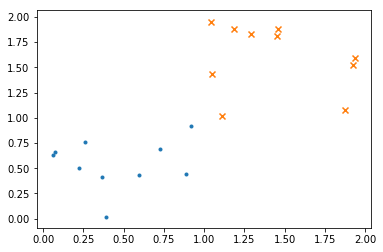

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# ランダムにx, y 座標を生成 x ∈ [0, 1), y ∈ [0, 1)
c1 = np.random.random_sample((10,2))
# ランダムにx, y 座標を生成 x ∈ [1, 2), y ∈ [1, 2)
c2 = np.random.random_sample((10,2)) + 1

# プロット
plt.scatter(c1.T[0], c1.T[1], marker='.')
plt.scatter(c2.T[0], c2.T[1], marker='x')

# Support Vector Machine での学習

sklearn を使う

In [2]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X = np.concatenate((c1, c2))
y = np.concatenate((np.zeros(10), np.ones(10)))

#rand_state = np.random.randint(0, 100)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

svc = LinearSVC()
svc.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

# 学習後の予測

In [3]:
print(svc.predict([[0.0, 0.0]]))
print(svc.predict([[5.0, 5.0]]))

[ 0.]
[ 1.]


# Decision boundary の可視化

In [4]:
def plot_result(c1, c2, svc):
    plt.scatter(c1.T[0], c1.T[1], marker='.')
    plt.scatter(c2.T[0], c2.T[1], marker='x')

    w = svc.coef_[0]
    a = -w[0] / w[1]
    linex = np.linspace(0, 2, 10)
    liney = a * linex - (svc.intercept_) / w[1]

    plt.plot(linex, liney)

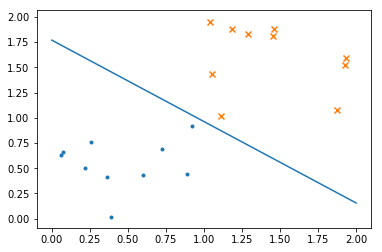

In [5]:
plot_result(c1,c2, svc)

# Outlier (はずれ値)

SVMはoutlierがあっても分類してくれる

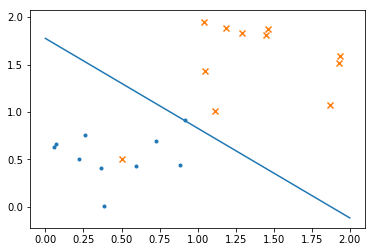

In [6]:
c2 = np.concatenate((c2, [[0.5,0.5]]))
X = np.concatenate((c1, c2))
y = np.concatenate((np.zeros(10), np.ones(11)))

svc.fit(X, y)
plot_result(c1,c2, svc)

# 非線形の場合

https://classroom.udacity.com/courses/ud120/lessons/2252188570/concepts/23499187100923

# Hands on

- 予測のConfidenceを確認してみよう!
    http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.decision_function

- データ・セット を変えてみよう! 
    http://scikit-learn.org/stable/datasets/index.html

- データ・セット を学習用・テスト用に分けて、学習後の分類の精度を確認しよう！
    - テストセットの分割:
        http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
    - 精度の確認 (score) :
        http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.score
    
- 非線形のSVMを使ってみよう!

    http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC